# Customers Plan Behavior

# Table of Contents
- [Megaline (Introduce to Machine Learning)](#scrollTo=HFVBp3qwiTvA)

    - [Initialization](#scrollTo=PiDM_Gd0iTvO)

    - [Load the Data and Preparation](#scrollTo=if03W1oCiTvS)

        - [2.1. Menampilkan sample data and mempelajarinya](#scrollTo=4ENFHQpTiTvT)

        - [2.2. Memperbaiki kualitas data](#scrollTo=298uMRwWiTve)

    - [EDA and Data Visualization](#scrollTo=wmzRRWxPiTvj)

    - [Split the Data](#scrollTo=OARiaTeWiTvo)

    - [Models](#scrollTo=wk0E7kcxiTvx)

        - [5.1. Logistic Regression](#scrollTo=kcyF3SDriTvy)

        - [5.2. Decision Tree](#scrollTo=ozwoXLqviTv-)

        - [5.3. Random Forest](#scrollTo=nCThytaviTwK)

        - [5.4. KNN](#scrollTo=lGhO-2HSiTwR)

- [Consclusions](#scrollTo=1Pk9EbU3iTwV)



# Megaline (Introduce to Machine Learning)

Operator seluler Megaline merasa tidak puas karena banyak pelanggan mereka yang masih menggunakan paket lama. Perusahaan tersebut ingin mengembangkan sebuah model yang dapat menganalisis perilaku konsumen dan merekomendasikan salah satu dari kedua paket terbaru Megaline: Smart atau Ultra.

Kami memiliki akses terhadap data perilaku para pelanggan yang sudah beralih ke paket terbaru (dari proyek kursus Analisis Data Statistik). Dalam tugas klasifikasi ini, Kami perlu mengembangkan sebuah model yang mampu memilih paket dengan tepat. Mengingat Kami telah menyelesaikan langkah pra-pemrosesan data, Kami bisa langsung menuju ke tahap pembuatan model.

Kami akan mengembangkan sebuah model yang memiliki accuracy setinggi mungkin. Pada proyek ini, ambang batas untuk tingkat accuracy-nya adalah 0,75. Kami akan memeriksa metrik accuracy model dengan menggunakan test dataset.

**Goals :**
1. Memisahkan data sumber menjadi training set, validation set, dan test set.
2. Memeriksa kualitas model yang berbeda dengan mengubah hyperparameter-nya. Menjelaskan secara singkat temuan-temuan yang  didapatkan dari penelitian ini.
3. Memeriksa kualitas model dengan menggunakan test set.
4. Melakukan sanity check terhadap model. 

## 1. Initialization

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# ml libraries
!pip install fast_ml
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 KB 1.9 MB/s eta 0:00:00


## 2. Load the Data and Preparation

### 2.1. Menampilkan *sample* data and mempelajarinya

In [2]:
# Load the data
df = pd.read_csv('/content/users_behavior.csv')

In [3]:
# menampilkan sample dataset
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [4]:
# menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Dataset kita terdiri dari **4** kolom dan **3214** baris, ada 4 kolom dideskripsikan sebagai **float** yaitu kolom `calls`, `minutes`, `messages`, dan `mb_used`. Kolom `minutes` dan `mb_used` seharusnya sudah memiliki type data yang sesuai karena memuat jumlah menit panggilan dan penggunaan data dalam *megabytes*, sedangkan kolom `calls` dan `messages` seharusnya memiliki type data **int** karena memuat jumlah panggilan dan jumlah pesan teks. Kolom `is_ultra` sudah memiliki type data yang sesuai.

### 2.2. Memperbaiki kualitas data

In [5]:
# memperbaiki type data
for col in ['calls', 'messages']:
    df[col] = df[col].apply(np.int64)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 125.7 KB


Kita telah memperbaiki type data kolom.

In [6]:
# menampilkan statistik deskriptif dari dataset
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Dari tabel diatas kita mengetahui rata-rata pelanggan menghabiskan **63** jumlah panggilan, **438** menit waktu bicara, **38** pesan teks, dan **17** gb data dalam periode tersebut. Sementara untuk jumlah minimun pemakaian oleh pelanngan adalah tidak menggunakan semua kuota yang terjadi pada setiap layanan yang kita sediakan. Pemakaian tertinggi yaitu sebanyak **244** panggilan, **1632** menit, **244** teks, dan **49** gb data dalam periode tersebut.

In [7]:
# memeriksa missing value
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Tidak ada *missing value* ditemukan.

## 3. EDA and Data Visualization

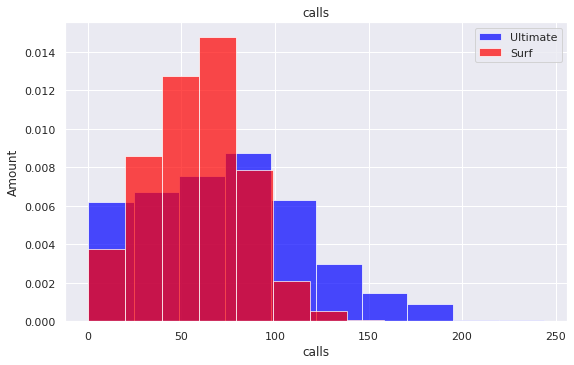

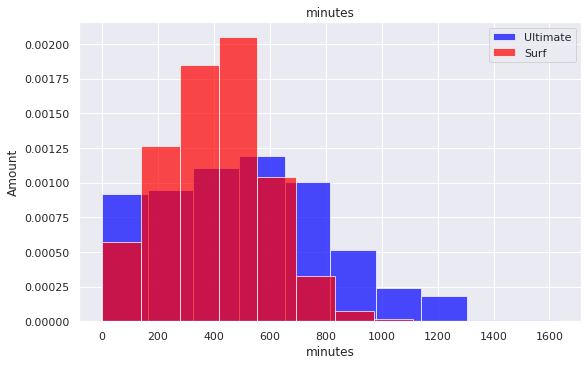

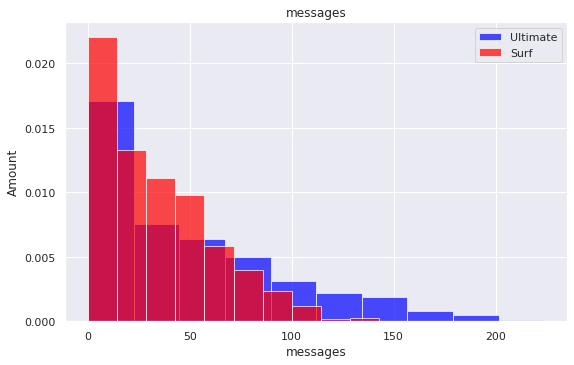

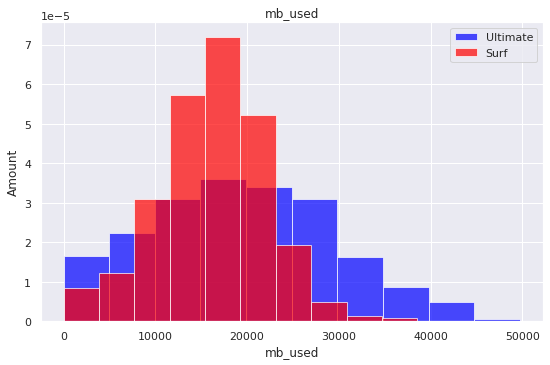

In [8]:
# Menampilkan visualisasi data
sns.set()

for label in df.columns[:-1]:
    plt.figure(figsize=(9, 5.5))
    plt.hist(df[df['is_ultra']==1][label], color='blue', label='Ultimate', alpha=0.7, density=True)
    plt.hist(df[df['is_ultra']==0][label], color='red', label='Surf', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Amount')
    plt.xlabel(label)
    plt.legend()
    plt.show()

**Temuan :**
- Dari grafik banyaknya jumlah panggilan yang dilakukan, rata-rata pengguna melakukan panggilan sebanyak **30-80** dalam satu bulan.
- Rata-rata pengguna menghabiskan **250-500** menit panggilan dalam satu bulan.
- Para pengguna dari kedua paket rata-rata tidak menggunakan kuota pesan teks sama sekali, hal ini mungkin terjadi karena mereka sudah beralih pada aplikasi pesan *instant* atau *chatting* menggunakan data internet.
- Data yang digunakan oleh pengguna dalam kedua paket berada di sekitar angka **10.000-20.000 mb** dalam satu bulan.

## 4. Split the Data

In [9]:
# Menampilkan jumlah kolom is_ultra
df.groupby('is_ultra').agg(count=('calls', 'count')).reset_index()

,is_ultra,count
0,0,2229
1,1,985


In [10]:
# menghitung rasio
df['is_ultra'].value_counts() / df.shape[0]

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

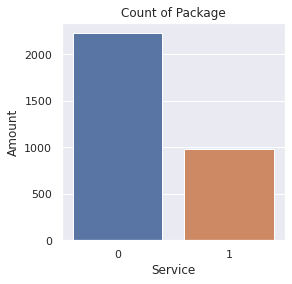

In [11]:
# Membuat diagram
plt.figure(figsize=(4,4))
sns.countplot(x='is_ultra', data=df, order=df['is_ultra'].value_counts().index)
plt.xlabel('Service')
plt.ylabel('Amount')
plt.title('Count of Package')
plt.show()

- Kita melihat jumlah yang tidak seimbang antara jumlah pengguna paket pada dataset, hal ini tentu akan berdampak pada model yang akan kita buat. 

- Rasio kolom `is_ultra` memiliki perbandingan **70:30 %**, hal ini dapat mengakibatkan model tidak dapat mempelajari data dengan baik.

In [12]:
# split the data in to training, validation, and test
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'is_ultra', train_size=0.70,
                                                                            valid_size=0.15, test_size=0.15, random_state=12)

Kita akan menggunakan proporsi data sebanyak **70%** untuk *data training*, **15%** untuk *data validation*, dan **15%** untuk *data test*, kita menetapkan nilai `random_state` untuk menghindari perbedaan hasil jika kita menjalankan ulang kode pada *notebook*.

In [13]:
# memeriksa dimensi data X_train
X_train.shape

(2249, 4)

In [14]:
# memeriksa dimensi data X_valid
X_valid.shape

(482, 4)

In [15]:
# memeriksa dimensi data X_test
X_test.shape

(483, 4)

In [16]:
# menampilkan sample data training
X_train.head()

,calls,minutes,messages,mb_used
643,136,965.78,0,31992.10
404,30,169.02,13,16626.53
1637,50,282.87,53,13260.03
551,0,0.00,24,18701.54
3177,114,731.76,10,25311.22


## 5. Models

### 5.1. Logistic Regression

In [17]:
# accuracy score lr model training set and validation set
print('Logistic Regression Model')
lr_result = defaultdict(list)

for solv in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:    
    lr_model = LogisticRegression(solver=solv)
    lr_model.fit(X_train, y_train)
    lr_model_train_pred = lr_model.predict(X_train)
    lr_model_valid_pred = lr_model.predict(X_valid)
    lr_result['solver'].append(solv)
    lr_result['train_accuracy'].append(accuracy_score(y_train, lr_model_train_pred))
    lr_result['valid_accuracy'].append(accuracy_score(y_valid, lr_model_valid_pred))
    
display(pd.DataFrame(lr_result))

Logistic Regression Model


,solver,train_accuracy,valid_accuracy
0,newton-cg,0.755002,0.742739
1,lbfgs,0.738550,0.728216
2,liblinear,0.745665,0.724066
3,sag,0.703868,0.682573
4,saga,0.703868,0.682573


Hasil dari **Logistic Regression Model** menghasilkan tingkat *accuracy* sebesar **75%** untuk *training test* dan **74%** pada *validation test* dengan menetapkan **newton-cg** pada parameter `solver`, artinya *validation set* tidak mampu mencapai batas ketentuan tingkat *accuracy* sebesar 75%. Selanjutnya kita akan mencoba menerapkan model ini pada *test set*.

In [18]:
# create the best logisticregression model
lr_model = LogisticRegression(solver='newton-cg')
lr_model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [19]:
# accuracy score lg model compare
print('Logistic Regression Model')
print('-------------------------')
y_train_lr_pred = lr_model.predict(X_train)
print('Training set accuracy =', accuracy_score(y_train, y_train_lr_pred))
y_valid_lr_pred = lr_model.predict(X_valid)
print('Validation set accuracy =', accuracy_score(y_valid, y_valid_lr_pred))
y_test_lr_pred = lr_model.predict(X_test)
print('Test set accuracy',  accuracy_score(y_test, y_test_lr_pred))

Logistic Regression Model
-------------------------
Training set accuracy = 0.7550022232103157
Validation set accuracy = 0.7427385892116183
Test set accuracy 0.7080745341614907


Hasil penerapan model pada data *test set* tidak mampu menaikkkan tingkat *accuracy* dan semakin terjadi penurunan pada *accuracy* menjadi **70.8%** yang menjadikan model ini tidak memenuh syarat untuk dijadikan sebagai model *machine learning*.

              precision    recall  f1-score   support

        Surf       0.70      0.99      0.82       317
    Ultimate       0.88      0.17      0.29       166

    accuracy                           0.71       483
   macro avg       0.79      0.58      0.55       483
weighted avg       0.76      0.71      0.64       483




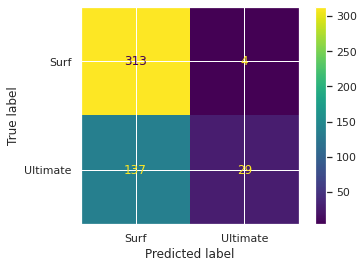

In [20]:
# classification report the lr model of data test
print(classification_report(y_test, y_test_lr_pred, target_names=['Surf', 'Ultimate']))
print()
# menampilkan confusion matrix data test
cm = confusion_matrix(y_test, y_test_lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Surf', 'Ultimate'])
disp.plot()
plt.show() 

- **Precision** pada paket ultimate lebih tinggi daripada paket surf, artinya prediksi pada paket ultimate lebih banyak yang benar daripada paket surf.

- Nilai **recall** pada paket ultimate sangat rendah yang artinya dari semua data yang benar-benar ultimate hanya sedikit yang terprediksi dengan benar.

Model ini tidak mampu memprediksi paket ultimate dengan baik, mungkin karena data yang kita punya tidak seimbang.

### 5.2. Decision Tree 

In [21]:
# Data train and validation set test
print('Decision Tree Model')
dt_result = defaultdict(list)

for depth in range(1, 11):
    dt_model = DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(X_train, y_train)
    dt_model_train_pred = dt_model.predict(X_train)
    dt_model_valid_pred = dt_model.predict(X_valid)
    dt_result['max_depth'].append(depth)
    dt_result['train_accuracy'].append(accuracy_score(y_train, dt_model_train_pred))
    dt_result['valid_accuracy'].append(accuracy_score(y_valid, dt_model_valid_pred))
    
display(pd.DataFrame(dt_result))

Decision Tree Model


,max_depth,train_accuracy,valid_accuracy
0,1,0.759893,0.744813
1,2,0.790574,0.780083
2,3,0.805247,0.792531
3,4,0.813695,0.792531
4,5,0.825700,0.773859
5,6,0.837261,0.780083
6,7,0.850156,0.769710
7,8,0.861272,0.786307
8,9,0.873277,0.767635
9,10,0.887950,0.778008


Dari beberapa proses *looping* yang kita gunakan dalam **Decision Tree Model** kita menetapkan parameter **max_dept** dengan *range* **1-11** dan mendapatkan beberapa hasil tingkat *accuracy* maka kita menetapkan menggunakan nilai **max_depth = 3** karena nilai tersebut telah melewati nilai ambang batas yang ditentukan dan tingkat *accuracy* antara *data train testing*, *data validation testing*, dan *data test testing* menghasilkan tingkat *accuracy* yang paling konsisten atau tidak tejadi *overfitting*.

In [22]:
# create decision tree model
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
# accuracy score dt model compare
print('Decision Tree Model')
print('-------------------------')
y_train_dt_pred = dt_model.predict(X_train)
print('Training set accuracy =', accuracy_score(y_train, y_train_dt_pred))
y_valid_dt_pred = dt_model.predict(X_valid)
print('Validation set accuracy =', accuracy_score(y_valid, y_valid_dt_pred))
y_test_dt_pred = dt_model.predict(X_test)
print('Test set accuracy',  accuracy_score(y_test, y_test_dt_pred))

Decision Tree Model
-------------------------
Training set accuracy = 0.8052467763450423
Validation set accuracy = 0.7925311203319502
Test set accuracy 0.7660455486542443


Pada model ini tingkat *accuracy* pada *training set* menghasilkan angka **80%**, pada *validation set* menghasilkan angka **79.2%**, dan **76.6%** pada *test set* yang menjadikan model ini telah melewati *threshold* tingkat *accuracy* yang ditentukan.

              precision    recall  f1-score   support

        Surf       0.76      0.93      0.84       317
    Ultimate       0.78      0.45      0.57       166

    accuracy                           0.77       483
   macro avg       0.77      0.69      0.70       483
weighted avg       0.77      0.77      0.75       483




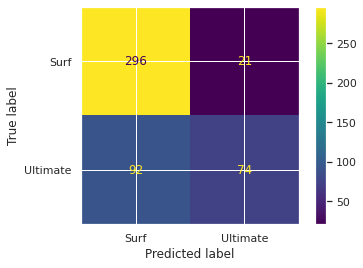

In [24]:
# classification report the dt model of data test
print(classification_report(y_test, y_test_dt_pred, target_names=['Surf', 'Ultimate']))
print()
# menampilkan confusion matrix data test
cm = confusion_matrix(y_test, y_test_dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Surf', 'Ultimate'])
disp.plot()
plt.show() 

- **Precision** pada paket ultimate hampir sama daripada paket surf, artinya prediksi yang benar pada paket ultimate dan paket surf ultimate hampir setara.

- Pada model ini juga nilai **recall** pada paket ultimate sangat rendah yang artinya dari semua data yang benar-benar ultimate hanya sedikit yang terprediksi dengan benar.

Model ini juga tidak mampu memprediksi paket ultimate dengan baik, hal ini mungkin terjadi karena data kita punya tidak seimbang.

### 5.3. Random Forest

In [25]:
# accuracy score rf model training and validation set test
print('Random Forest Model')
rf_result = defaultdict(list)

for n in range(1,6):
    rf_model = RandomForestClassifier(random_state=42, n_estimators=n)
    rf_model.fit(X_train, y_train) 
    rf_model_train_pred = rf_model.predict(X_train)
    rf_model_valid_pred = rf_model.predict(X_valid)
    rf_result['n_estimators'].append(n)
    rf_result['train_accuracy'].append(accuracy_score(y_train, rf_model_train_pred))
    rf_result['valid_accuracy'].append(accuracy_score(y_valid, rf_model_valid_pred))
    
display(pd.DataFrame(rf_result))

Random Forest Model


,n_estimators,train_accuracy,valid_accuracy
0,1,0.905291,0.724066
1,2,0.916407,0.769710
2,3,0.955091,0.778008
3,4,0.949755,0.769710
4,5,0.966207,0.773859


Hasil dari **Random Forest Model** menunjukan terjadinya *overfitting* pada *training set* dengan angka **95%** terhadap *validation set* menghasilkan angka **77%**, dengan parameter `n-estimator` ditetapkan pada nilai **3**.

In [26]:
# create RandomForestClassifier best model
rf_model = RandomForestClassifier(random_state=42, n_estimators=3) 
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [27]:
# accuracy score rf model compare
print('Random Forest Model')
print('-------------------------')
y_train_rf_pred = rf_model.predict(X_train)
print('Training set accuracy =', accuracy_score(y_train, y_train_rf_pred))
y_valid_rf_pred = rf_model.predict(X_valid)
print('Validation set accuracy =', accuracy_score(y_valid, y_valid_rf_pred))
y_test_rf_pred = rf_model.predict(X_test)
print('Test set accuracy',  accuracy_score(y_test, y_test_rf_pred))

Random Forest Model
-------------------------
Training set accuracy = 0.9550911516229436
Validation set accuracy = 0.7780082987551867
Test set accuracy 0.7536231884057971


Pada *test set* juga tidak menghasilkan perbedaan yang signifikan dengan menghasilkan tingkat *accuracy* sebesar **75%**. Dengan demikian model ini memang melewati nilai *threshold* yang ditentukan tetapi terjadinya *overfitting* menjadikan model ini tidak bisa kita gunakan.

              precision    recall  f1-score   support

        Surf       0.79      0.86      0.82       317
    Ultimate       0.67      0.55      0.61       166

    accuracy                           0.75       483
   macro avg       0.73      0.71      0.71       483
weighted avg       0.75      0.75      0.75       483




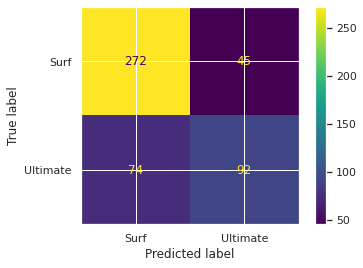

In [28]:
# classification report the rf model of data test
print(classification_report(y_test, y_test_rf_pred, target_names=['Surf', 'Ultimate']))
print()
# menampilkan confusion matrix data test
cm = confusion_matrix(y_test, y_test_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Surf', 'Ultimate'])
disp.plot()
plt.show() 

- **Precision** pada paket surf lebih tinggi daripada paket ultimate, artinya prediksi pada paket surf lebih banyak yang benar daripada paket ultimate, hal ini berbeda dengan dua prediksi sebelumnya.

- Nilai **recall** pada paket ultimate lebih rendah dari paket surf tetapi lebih tinggi dari dua model sebelumnya yang artinya dari semua data yang benar-benar ultimate hanya sedikit yang terprediksi dengan benar.

Model ini juga tidak mampu memprediksi paket ultimate dengan baik, ketindakseimbangan data mungkin berpengaruh pada hasil tersebut.

### 5.4. KNN

In [29]:
# accuracy score knn model training setand validation set test
print('Random Forest Model')
knn_result = defaultdict(list)

for n in [1, 2, 3, 5, 7, 10, 13, 16, 21, 25, 29, 30]:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train) 
    knn_model_train_pred = knn_model.predict(X_train)
    knn_model_valid_pred = knn_model.predict(X_valid)
    knn_result['n_estimators'].append(n)
    knn_result['train_accuracy'].append(accuracy_score(y_train, knn_model_train_pred))
    knn_result['valid_accuracy'].append(accuracy_score(y_valid, knn_model_valid_pred))
    
display(pd.DataFrame(knn_result))

Random Forest Model


,n_estimators,train_accuracy,valid_accuracy
0,1,1.000000,0.690871
1,2,0.839484,0.744813
2,3,0.854602,0.751037
3,5,0.816807,0.753112
4,7,0.807025,0.761411
5,10,0.794131,0.761411
6,13,0.794131,0.763485
7,16,0.779902,0.751037
8,21,0.779458,0.755187
9,25,0.772788,0.755187


In [30]:
# create the best KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

Hasil dari **K-Nearest Neighbors Classifier Model** menghasilkan tingkat *accuracy* pada *training test* yang cukup baik sebesar **76.9%**, pada *validation testing* menghasilkan tingkat accuracy sebesar **75%**. Angka-angka tersebut telah memenuhi kriteria ambang batas dari nilai minimal tingkat *accuracy* yang ditentukan dan tidak terjadi *overfitting*, selanjutnya kita akan menerapkannya pada *test set*.

In [31]:
# accuracy score knn model compare
print('K-Nearest Neighbors Model')
print('-------------------------')
y_train_knn_pred = knn_model.predict(X_train)
print('Training set accuracy =', accuracy_score(y_train, y_train_knn_pred))
y_valid_knn_pred = knn_model.predict(X_valid)
print('Validation set accuracy =', accuracy_score(y_valid, y_valid_knn_pred))
y_test_knn_pred = knn_model.predict(X_test)
print('Test set accuracy',  accuracy_score(y_test, y_test_knn_pred))

K-Nearest Neighbors Model
-------------------------
Training set accuracy = 0.7692307692307693
Validation set accuracy = 0.7531120331950207
Test set accuracy 0.7184265010351967


Pada *test set* menyajikan hasil yang tidak baik karena tingkat *accuracy* menurun cukup signifikan hingga berada dibawah ketentuan *threshold* dengan angka **71.8%** yang menjadikan model ini tidak bisa kita gunakan sebagai *machine learning*.

              precision    recall  f1-score   support

        Surf       0.71      0.97      0.82       317
    Ultimate       0.79      0.25      0.38       166

    accuracy                           0.72       483
   macro avg       0.75      0.61      0.60       483
weighted avg       0.74      0.72      0.67       483




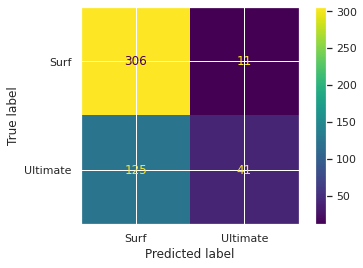

In [32]:
# classification report the knn model of data test
print(classification_report(y_test, y_test_knn_pred, target_names=['Surf', 'Ultimate']))
print()
# menampilkan confusion matrix data test
cm = confusion_matrix(y_test, y_test_knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Surf', 'Ultimate'])
disp.plot()
plt.show() 

- Pada model ini hasil dari **classification report** hampir sama dengan hasil dari model **logistic regression**, **precision** pada paket ultimate lebih tinggi daripada paket surf, artinya prediksi pada paket ultimate lebih banyak yang benar daripada paket surf.

- Hasil yang mirip juga didaptkan pada nilai **recall** pada paket ultimate sangat rendah yang artinya dari semua data yang benar-benar ultimate hanya sedikit yang terprediksi dengan benar.

Model ini tidak mampu memprediksi paket ultimate dengan baik, data yang tidak seimbang bisa menjadi penyebab hal ini terjadi.

# Consclusions

**1. Data Preparation**
- Kita memulai dengan memauat dataset yang terdiri dari **4** kolom dan **3214** baris, ada 4 kolom dideskripsikan sebagai **float** yaitu kolom `calls`, `minutes`, `messages`, dan `mb_used`.
- Kita mengubah kolom `calls` yang memuat jumlah panggilan dan `messages` yang memuat jumlah pesan terkirim menjadi **int**.

**2. EDA and Data Visualization**
- Dari grafik banyaknya jumlah panggilan yang dilakukan, rata-rata pengguna melakukan panggilan sebanyak **30-80** dalam satu bulan.
- Rata-rata pengguna menghabiskan **250-500** menit panggilan dalam satu bulan.
- Para pengguna dari kedua paket rata-rata tidak menggunakan kuota pesan teks sama sekali, hal ini mungkin terjadi karena mereka sudah beralih pada aplikasi pesan *instant* atau *chatting* menggunakan data internet.
- Data yang digunakan oleh pengguna dalam kedua paket berada di sekitar angka **10.000-20.000 mb** dalam satu bulan.

**3. Split the Data**
- Kita menggunakan library `fast_ml.model_development` untuk membagi data langsung menjadi **3** jenis dengan proporsi **70%** *training set*, **15%** *validation set*, dan **15%** untuk *test set*.

**4. Models**

Kita menggunakan beberapa model dengan sejumlah pengaturan pada parameternya untuk mendapatkan hasil terbaik:
1. Hasil dari **Logistic Regression Model** menghasilkan tingkat *accuracy* sebesar **75%** untuk *training test* dan **74%** pada *validation test* dengan menetapkan **newton-cg** pada parameter `solver`. Hasil penerapan model pada data *test set* tidak mampu menaikkkan tingkat *accuracy* dan semakin terjadi penurunan pada *accuracy* menjadi **70.8%** yang menjadikan model ini tidak memenuh syarat untuk dijadikan sebagai model *machine learning*.
2. Dari beberapa proses *looping* yang kita gunakan dalam **Decision Tree Model** kita menetapkan parameter **max_dept** dengan *range* **1-11** dan mendapatkan beberapa hasil tingkat *accuracy* maka kita menetapkan menggunakan nilai **max_depth = 3**. Pada model ini tingkat *accuracy* pada *training set* menghasilkan angka **80%**, pada *validation set* menghasilkan angka **79.2%**, dan **76.6%** pada *test set* yang menjadikan model ini telah melewati *threshold* tingkat *accuracy* yang ditentukan.
3. Hasil dari **Random Forest Model** menunjukan terjadinya *overfitting* pada *training set* dengan angka **95%** terhadap *validation set* menghasilkan angka **77%**, dengan parameter `n-estimator` ditetapkan pada nilai **3**. Pada *test set* juga tidak menghasilkan perbedaan yang signifikan dengan menghasilkan tingkat *accuracy* sebesar **75%**. Dengan demikian model ini memang melewati nilai *threshold* yang ditentukan tetapi terjadinya *overfitting* menjadikan model ini tidak bisa kita gunakan.
4. Hasil dari **K-Nearest Neighbors Classifier Model** menghasilkan tingkat *accuracy* pada *training test* yang cukup baik sebesar **76.9%**, pada *validation testing* menghasilkan tingkat accuracy sebesar **75%**. Pada *test set* menyajikan hasil yang tidak baik karena tingkat *accuracy* menurun cukup signifikan hingga berada dibawah ketentuan *threshold* dengan angka **71.8%** yang menjadikan model ini tidak bisa kita gunakan sebagai *machine learning*.

**Main Consclusion**

Kita menemukan model terbaik dengan nilai *accuracy* paling tinggi dan *margin* paling rendah pada **Decision Tree Model** dengan parameter `max_dept` di-set ke angka **3**.